In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/CustomerChurn.csv')

In [3]:
df.shape


(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

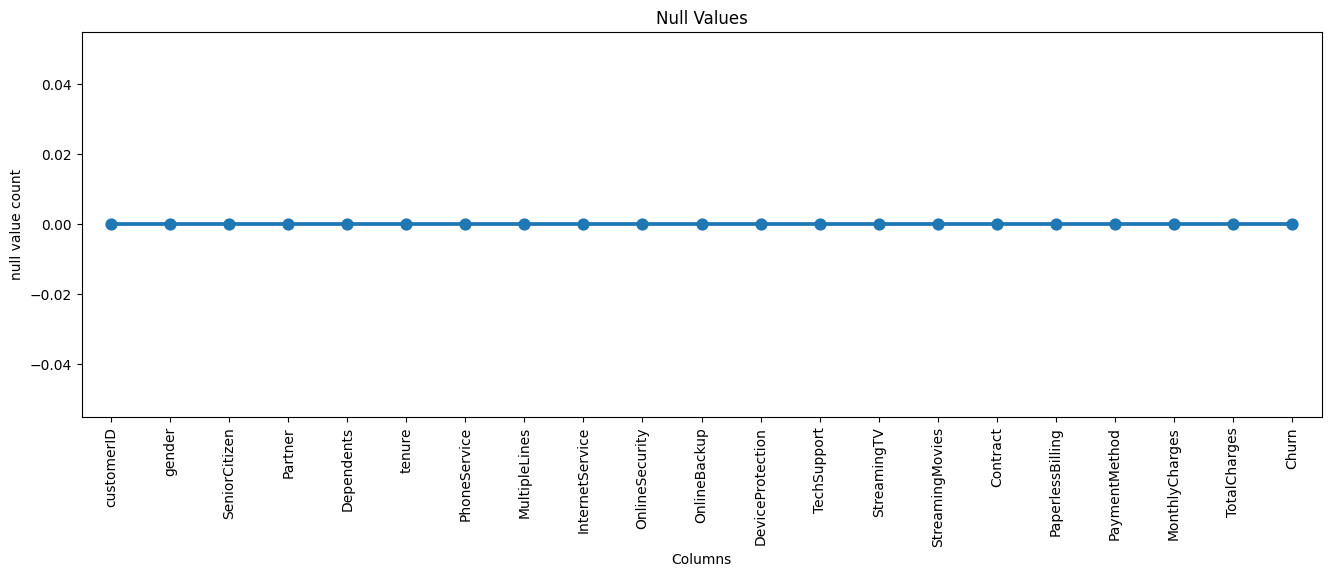

In [7]:
missingData = pd.DataFrame((df.isnull().sum()/df.shape[0])*100).reset_index()
plt.figure(figsize=(16,5))
ax=sns.pointplot(x='index',y=0,data=missingData)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('null value count')
plt.title('Null Values')
plt.show()

### Missing Data - Initial Intuition
    - Here we dont have any missing data

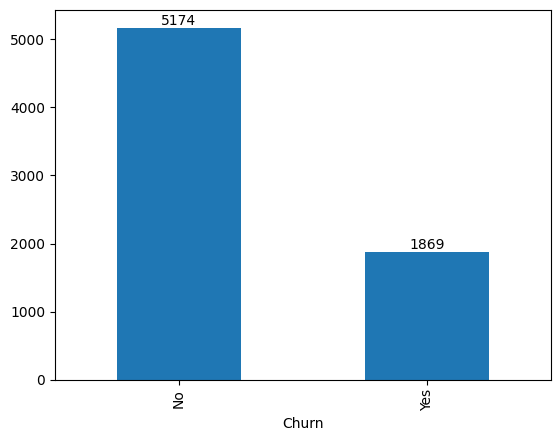

In [8]:
idk=df['Churn'].value_counts().plot(kind='bar')
for bars in idk.containers:
    idk.bar_label(bars)

# Data Cleaning

In [9]:
new_df=df.copy()

### Change the datatype of total charges column to numeric

In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
# there are 11 whitspace strings in total charges column because of that we will face some issue during conversion from string to numeric
# so first replace whitespace with NaN

In [12]:
new_df['TotalCharges'] = new_df['TotalCharges'].replace(r'^\s*$', np.nan, regex=True)

In [13]:
new_df.TotalCharges=pd.to_numeric(new_df.TotalCharges,errors='coerce')

In [14]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
new_df.dropna(inplace=True)

### Create bins for tenure column to get more clear insights

In [16]:
# find the max value of tenure column to create the labels upto the max value
print(new_df['tenure'].max())

72


In [17]:
labels=["{0}-{1}".format(i,i+11) for i in range(1,72,12)]
labels

['1-12', '13-24', '25-36', '37-48', '49-60', '61-72']

In [18]:
bins = list(range(1,74,12))
bins

[1, 13, 25, 37, 49, 61, 73]

In [19]:
new_df['tenure_grp']=pd.cut(new_df['tenure'],bins=bins,labels=labels,right=False) # this right=False doesnt include the right enpoint in each interval
new_df['tenure_grp'].value_counts()

,count
tenure_grp,
1-12,2175
61-72,1407
13-24,1024
25-36,832
49-60,832
37-48,762


In [20]:
new_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_grp
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


In [21]:
# remove cols that are not required
new_df.drop(columns=['customerID','tenure'],axis=1,inplace=True)

In [ ]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_grp
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


# Data Exploration
### Univariate Analysis

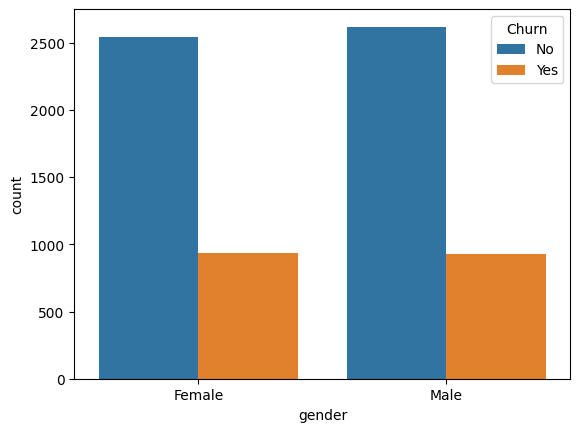

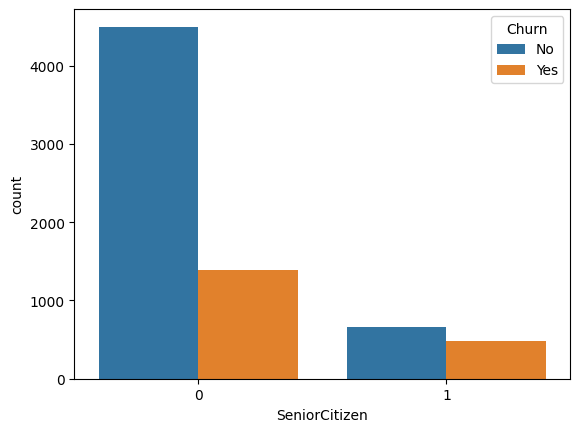

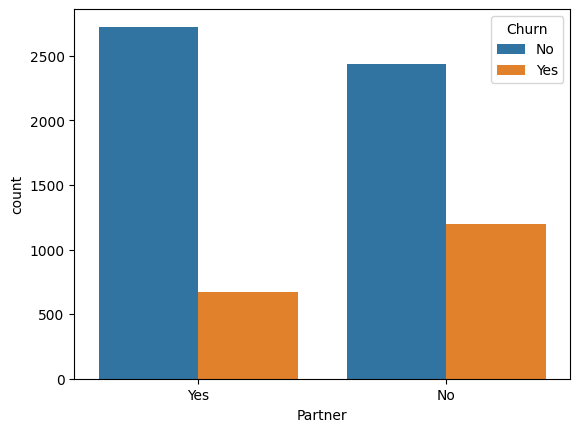

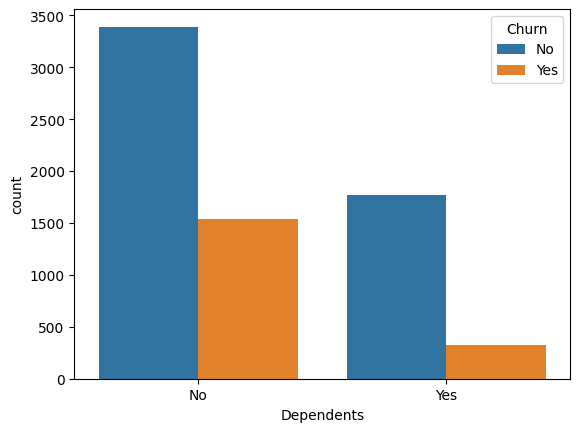

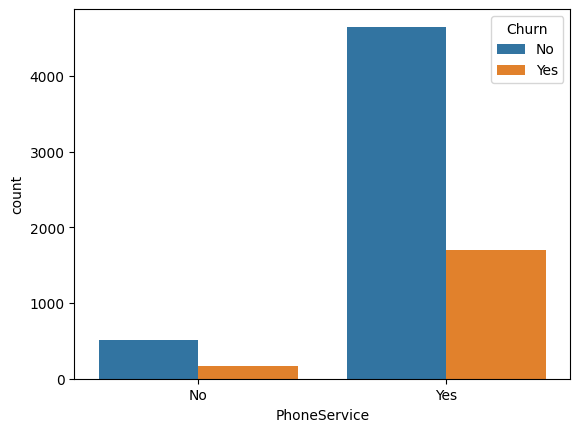

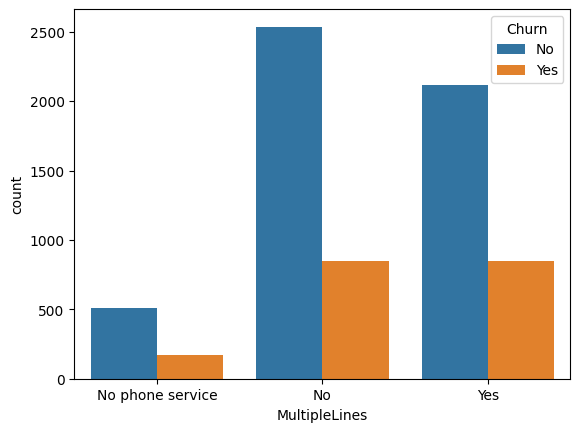

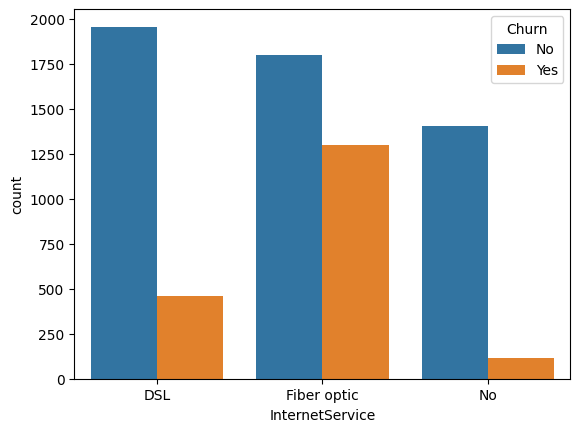

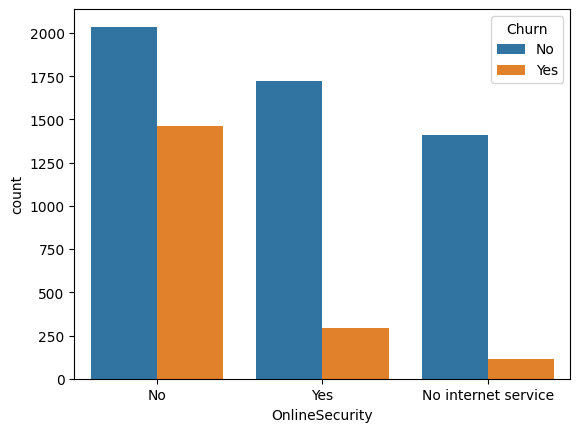

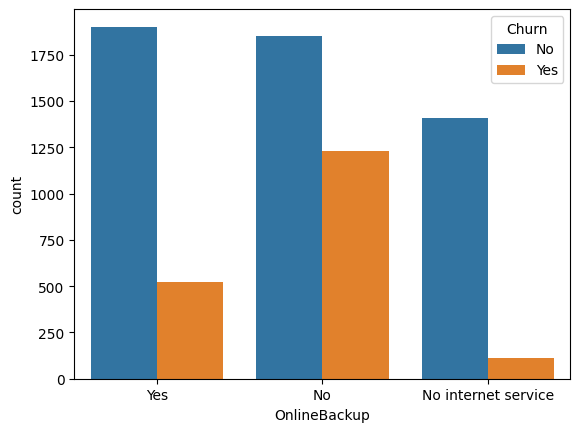

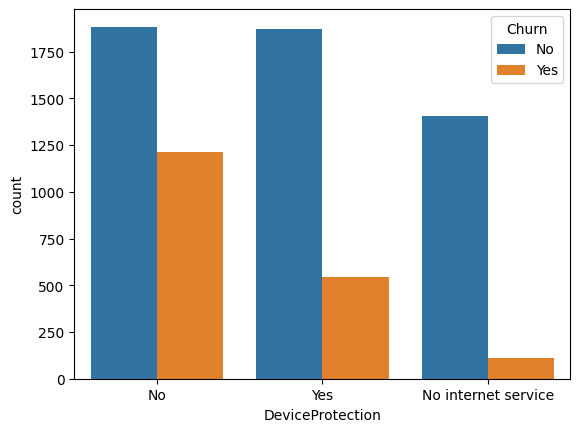

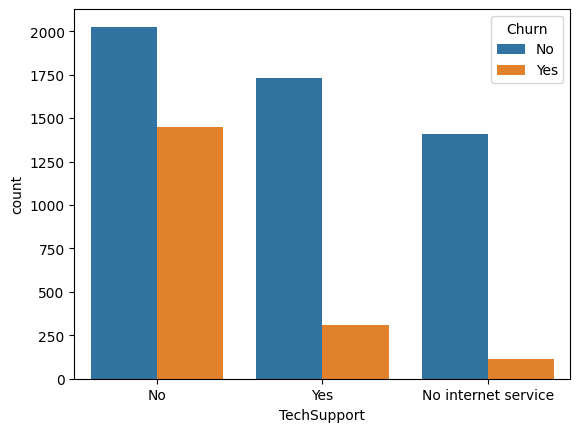

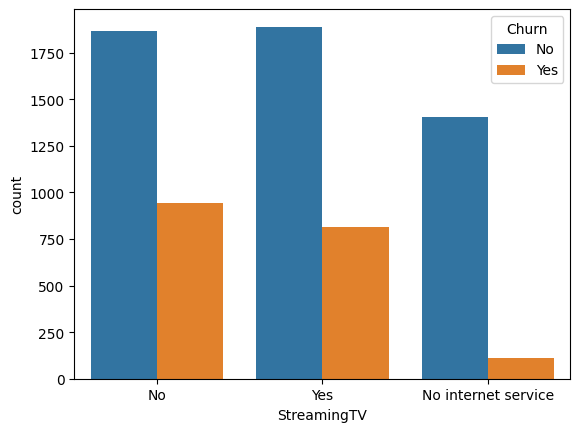

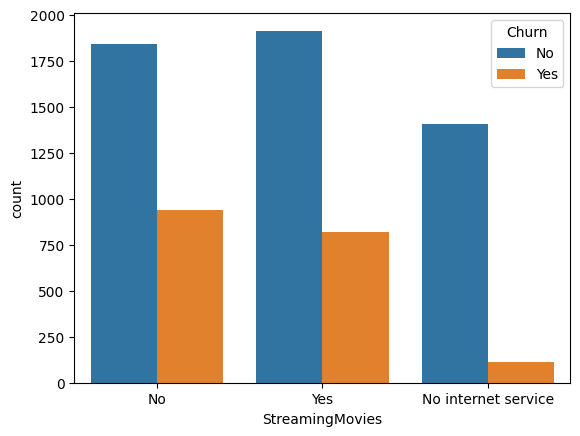

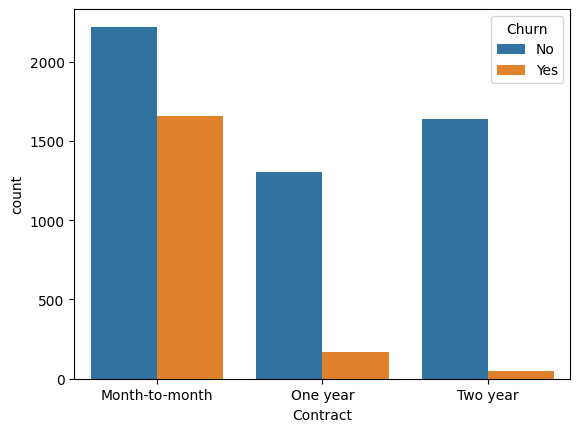

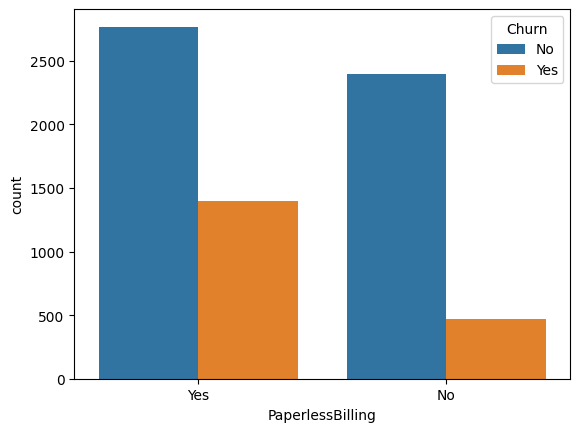

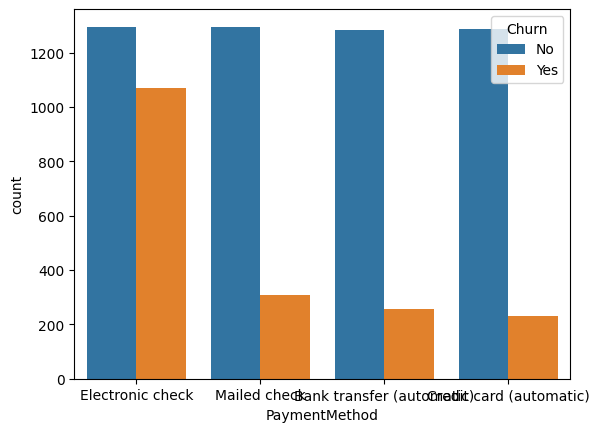

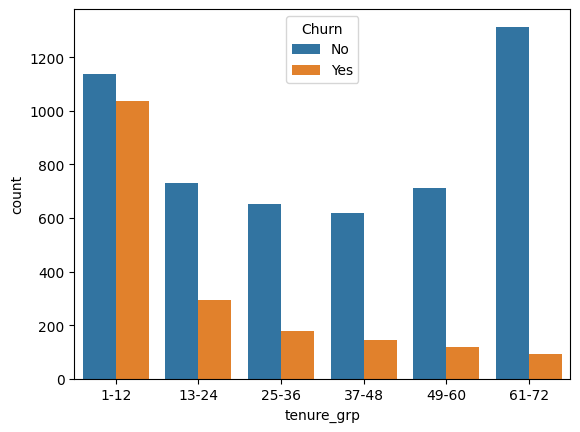

In [22]:
for i,predictor in enumerate(new_df.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=new_df,x=predictor,hue='Churn')

### conclusion -
##### -senior citizen are more likely to churn
##### -People with no partners are more likely to churn
##### -Monthly contracts are more likeyly to churn becuase they are free customers
##### -People who pay via electornic check are more likely to churn



In [23]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_grp
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


In [24]:
new_df.gender.value_counts()

,count
gender,
Male,3549
Female,3483


In [25]:
notchurndf=new_df[new_df['Churn']=='No']
churndf=new_df[new_df['Churn']=='Yes']

In [26]:
churndf

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_grp
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12
5,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1-12
8,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,25-36
13,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,49-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,0,No,No,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes,1-12
7026,Female,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes,1-12
7032,Male,1,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes,1-12
7034,Female,0,No,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes,61-72


In [27]:
churndf.gender.value_counts()

,count
gender,
Female,939
Male,930


Text(0.5, 1.0, ' Churned Male and Female customers')

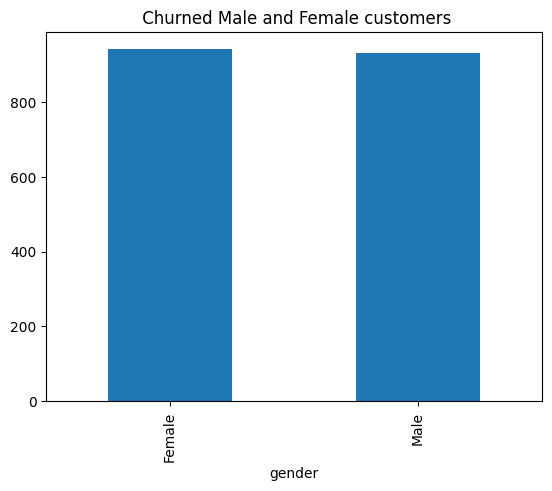

In [28]:
churndf.gender.value_counts().plot(kind='bar')
plt.title(' Churned Male and Female customers')

In [29]:
pd.crosstab(new_df.PaymentMethod, new_df.Churn)

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


<Axes: xlabel='Churn', ylabel='PaymentMethod'>

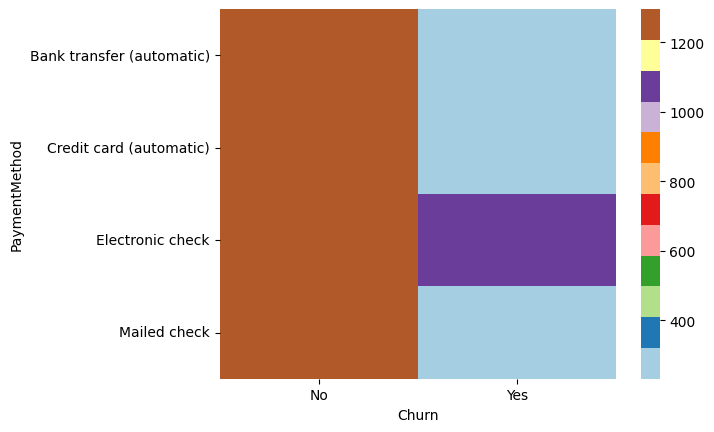

In [30]:
sns.heatmap(pd.crosstab(new_df.PaymentMethod, new_df.Churn), cmap='Paired')

In [31]:
new_df['Churn']=np.where(new_df['Churn']=='Yes',1,0)
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_grp
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


In [32]:
dummy=pd.get_dummies(new_df)
dummy.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_grp_1-12,tenure_grp_13-24,tenure_grp_25-36,tenure_grp_37-48,tenure_grp_49-60,tenure_grp_61-72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


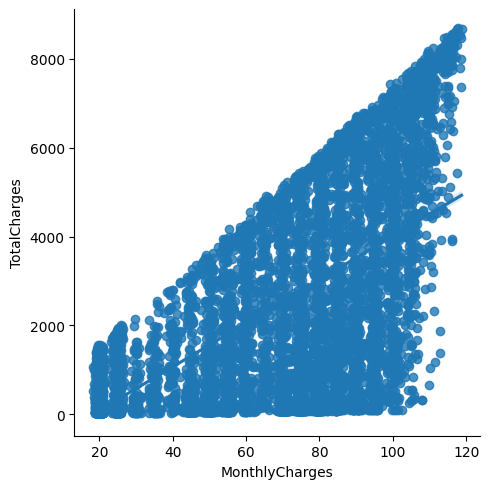

In [33]:
sns.lmplot(data=dummy,x='MonthlyCharges',y='TotalCharges')

In [34]:
dummy['MonthlyCharges'].corr(dummy['TotalCharges'])

np.float64(0.6510648032262027)

### Linear relationship between monthly charges and total charges

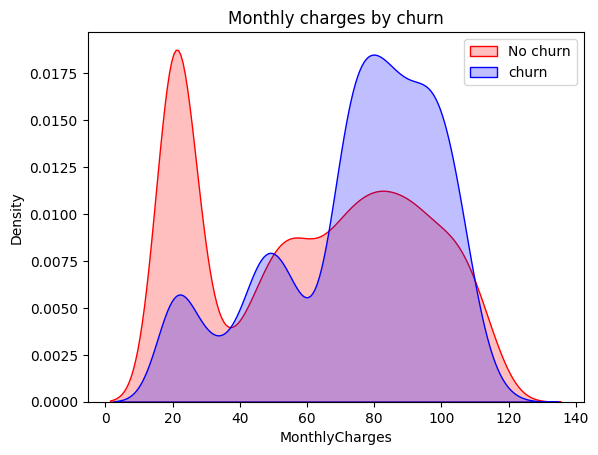

In [35]:
kd = sns.kdeplot(dummy.MonthlyCharges[(dummy['Churn'] == 0)],color='red',fill='True')
ad = sns.kdeplot(dummy.MonthlyCharges[(dummy['Churn'] == 1)],color='blue',fill='True')
plt.legend(['No churn','churn'],loc='upper right')
plt.title('Monthly charges by churn')
plt.show()

#### Churn is high when monthly charges are high

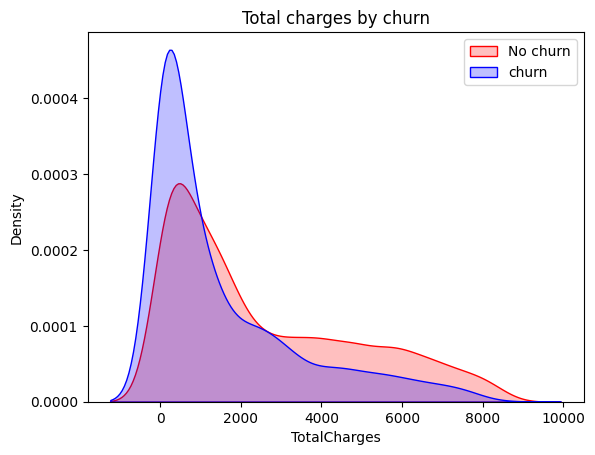

In [36]:
kd = sns.kdeplot(dummy.TotalCharges[(dummy['Churn'] == 0)],color='red',fill='True')
ad = sns.kdeplot(dummy.TotalCharges[(dummy['Churn'] == 1)],color='blue',fill='True')
plt.legend(['No churn','churn'],loc='upper right')
plt.title('Total charges by churn')
plt.show()

#### Higher churn when lower total charges
#### Higher monthly charges, lower Tenure and low total charges linked to high churn

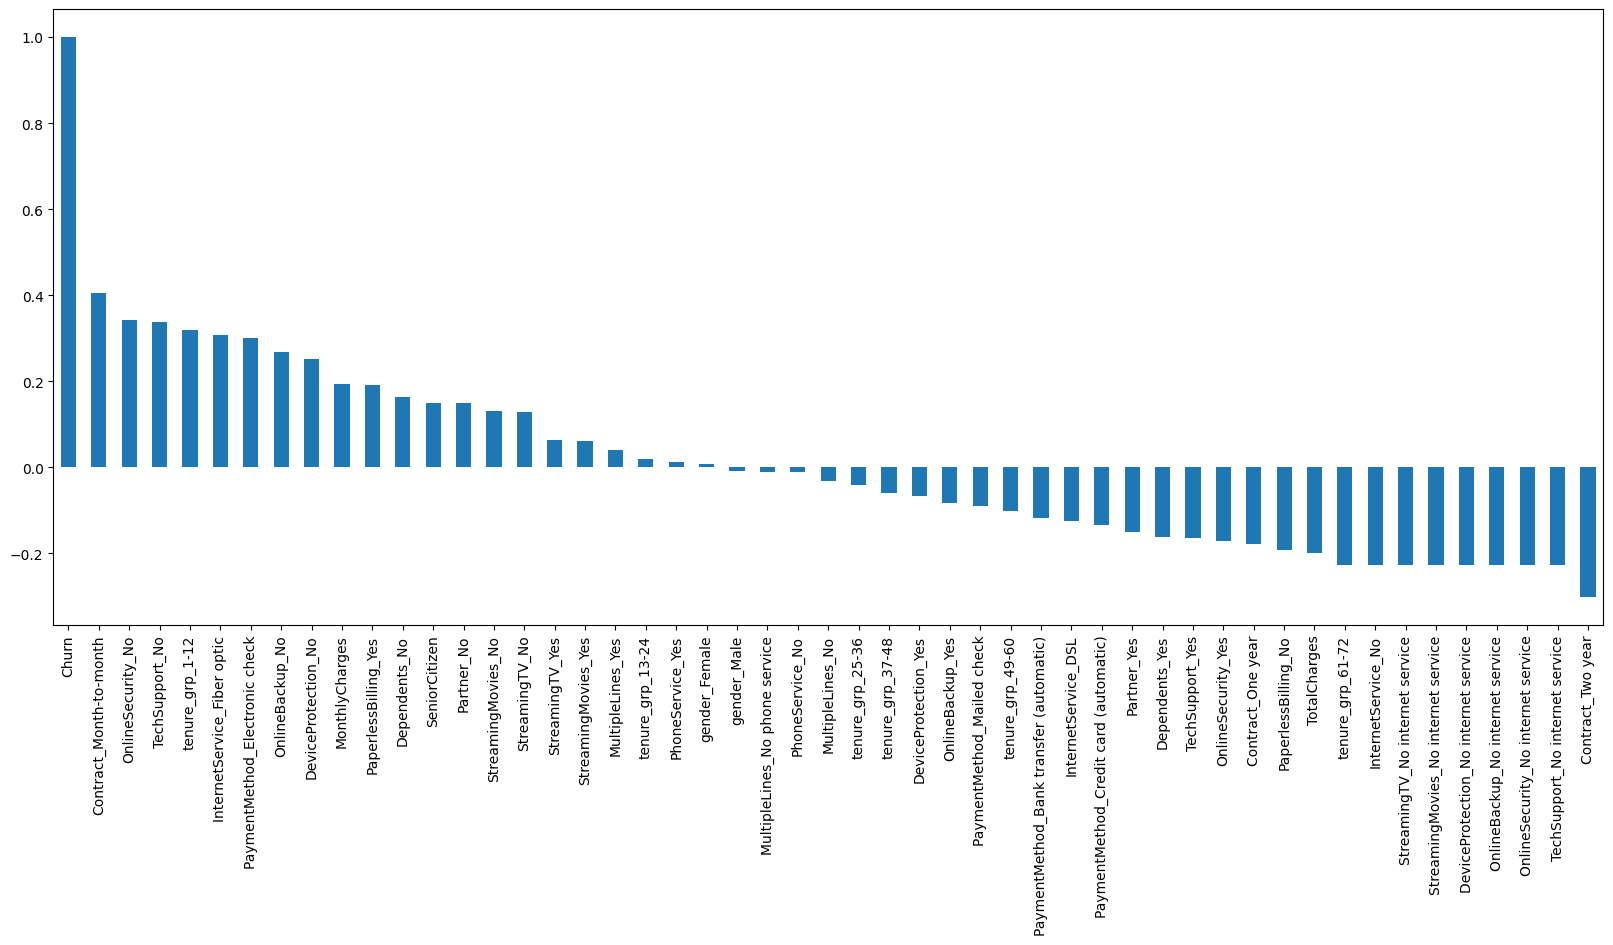

In [37]:
plt.figure(figsize=(20,8))
dummy.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

plt.show()

##### HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

##### LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

##### Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

<Axes: >

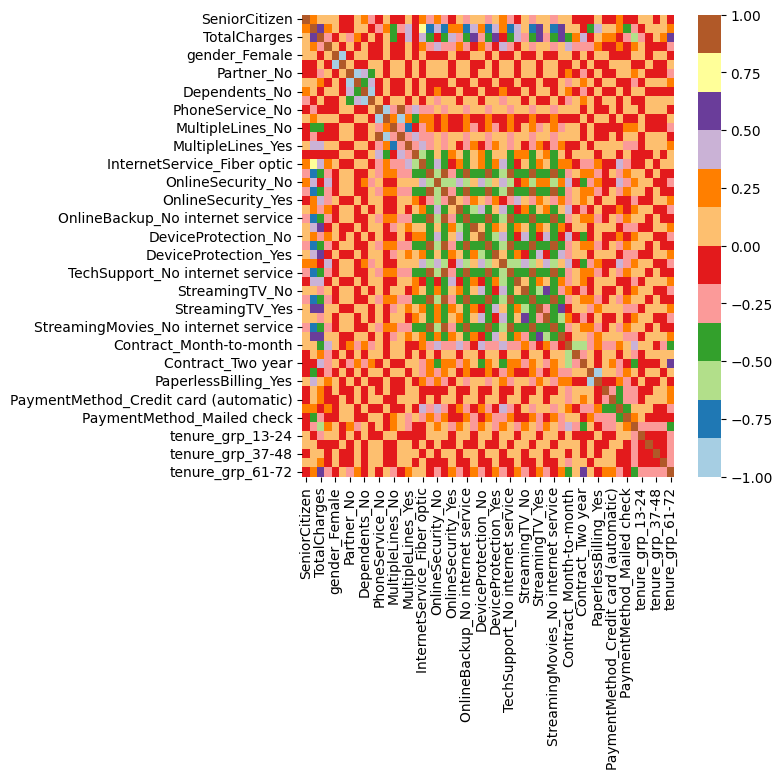

In [38]:
plt.figure(figsize=(6,6))
sns.heatmap(dummy.corr(),cmap='Paired')

In [39]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


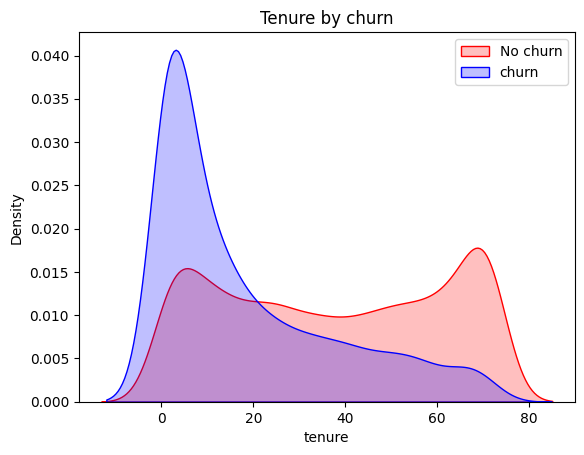

In [40]:
kd = sns.kdeplot(df.tenure[(df['Churn'] == 'No')],color='red',fill='True')
ad = sns.kdeplot(df.tenure[(df['Churn'] == 'Yes')],color='blue',fill='True')
plt.legend(['No churn','churn'],loc='upper right')
plt.title('Tenure by churn')
plt.show()

In [41]:
dummy.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_grp_1-12,tenure_grp_13-24,tenure_grp_25-36,tenure_grp_37-48,tenure_grp_49-60,tenure_grp_61-72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


Text(0.5, 1.0, 'Distribution of Gender for Churned Customers')

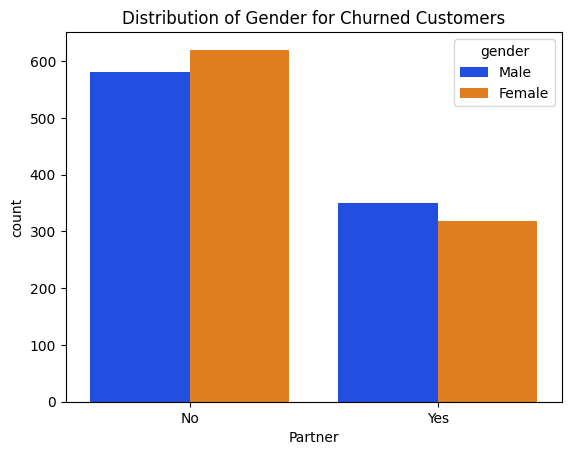

In [42]:
sns.countplot(x='Partner',hue='gender',data=churndf,palette='bright')
plt.title("Distribution of Gender for Churned Customers")

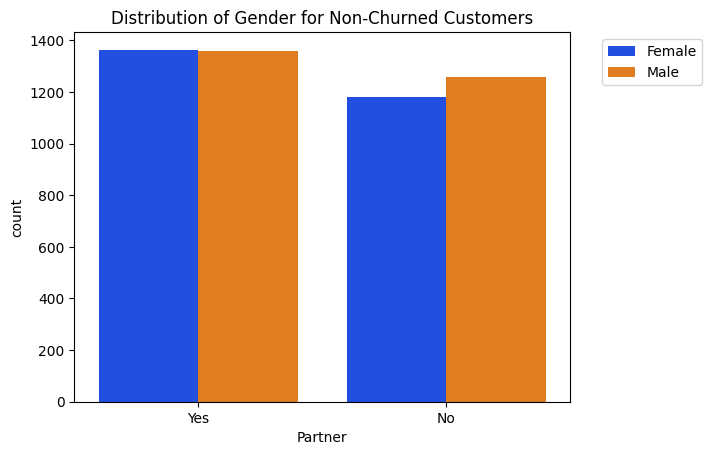

In [43]:
sns.countplot(x='Partner',hue='gender',data=notchurndf,palette='bright')
plt.title("Distribution of Gender for Non-Churned Customers")
plt.legend(bbox_to_anchor=(1.05, 1))

##### Female with no partner are more likely to churn

Text(0.5, 1.0, 'Distribution of Payment Method for Churned Customers')

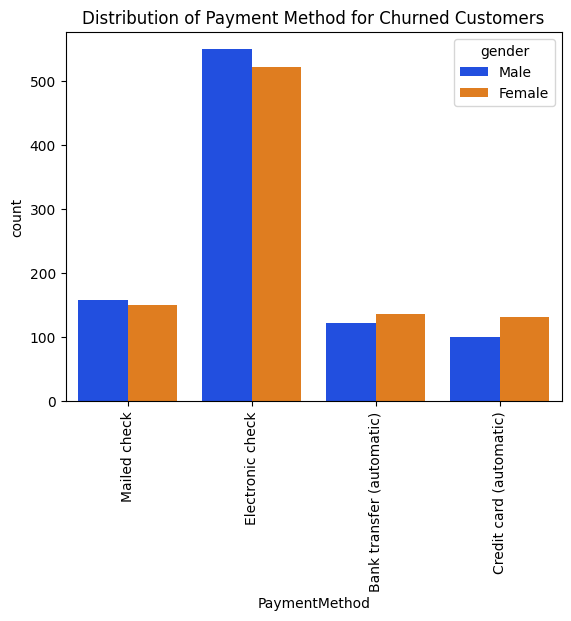

In [44]:
sns.countplot(x='PaymentMethod',hue='gender',data=churndf,palette='bright')
plt.xticks(rotation=90)
plt.title("Distribution of Payment Method for Churned Customers")


##### In addtion of electrnoic check, Female who are paying via credit card are more likeyly to churn

Text(0.5, 1.0, 'Distribution of Tech support for Churned Customers')

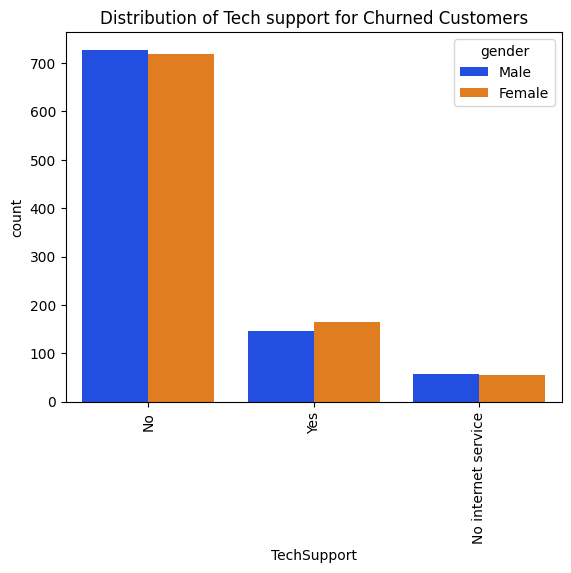

In [45]:
sns.countplot(x='TechSupport',hue='gender',data=churndf,palette='bright')
plt.xticks(rotation=90)
plt.title("Distribution of Tech support for Churned Customers")

# CONCLUSION
##### Electronic check medium are the highest churners
##### Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
##### No Online security, No Tech Support category are high churners
##### Non senior Citizens are high churners